### CASE STUDY PROBLEMS
### SUBMITTED BY: M.SOWMIA
### ROLL NO :  MA19M020

### PROBLEM:2
Solving the jeep problem,by minimizing the total fuel cost to cross the desert assuming infinite fuel availibilty at the starting point.
<br>

In [6]:
  #MODIFIED JEEP PROBLEM: ASSUMING INFINITE FUEL AT START -MINIMIZING FUEL COST FOR A PARTICULAR DISTANCE 
            #THIS PROBLEM IS FORMULATED AS A NON-LINEAR CONSTRINED PROBLEM
        
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

#DOING IT FOR DIFFERENT VALUES OF N-NO OF INTERMEDIATE POINTS
M=[2,3,4,5,6,7,9,10]
solutions=[]
for n in M:
    #defining the objective function
    def objective(values):
        return 500*values[n]+values[n+2*(n-1)]
    initial=[]
    #initilaising S,K,D,c
    for i in range(n):
        initial.append(1)
    for i in range(n-1):
        initial.append(1)
    for i in range(n-1):
        initial.append(1)
    initial.append(10)



    cons=[]
    #defining constraint 1
    def constraint1(values):
        return values[1]-values[n]*(500-2*values[2*n-1])-values[n+2*(n-1)]+values[2*n-1]
    cons.append({'type': 'eq', 'fun':constraint1})

    #defining the non-linear constraints i=2,3.....n-1
    def eqconstraints(values):
        listeq=[]
        for i in range(1,n-2):
            listeq.append(values[i+1]-values[n+i]*(500-2*values[2*n-1+i])-(500-values[2*n-1+i]))
        return listeq

    #for i in range(len(eqconstraints(initial))):
    cons.append({'type': 'eq', 'fun':eqconstraints})

    #putting constrint sn=500    
    def constrint4(values):
        return values[n-1]-500

    cons.append({'type': 'eq', 'fun':constrint4})

    #giving all  inequality constraints
    def ineqconstraints(values):
        listineq=[]
        for i in range(n):
            listineq.append(values[2*n-1+i]-250)
        listineq.append(values[n+2*(n-1)]-500)
        return listineq
    #for i in range(len(ineqconstraints(initial))):
    cons.append({'type': 'ineq', 'fun': ineqconstraints})


    #adding constraint d1+d2......dn=500
    def constraint3(values):
        SUM=0
        for i in range(n-1):
            SUM+=values[2*n-1+i]
        return SUM-500
    cons.append({'type': 'eq', 'fun':constraint3})

    bnds=[]    
    for i in range(n):
        bnds.append((0,None))
    for i in range(n-1):
        bnds.append((0,None))
    for i in range(n-1):
        bnds.append((0,None))
    bnds.append((0,500))

    soln=minimize(objective,initial,method='SLSQP',constraints=cons,bounds=bnds,options={'disp':True})
    print("The optimised solution for the cost function for n=",n ,"points inbetween is given by:")
    print(soln.x)
    print("\n")
    solutions.append(soln.fun)

    
    

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 500.0
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 5
The optimised solution for the cost function for n= 2 points inbetween is given by:
[  1. 500.   0. 500. 500.]


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 499.9999999994315
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
The optimised solution for the cost function for n= 3 points inbetween is given by:
[  1.         249.99999999 500.           0.           1.
 250.         250.         500.        ]


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 508.9954678268588
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 5
The optimised solution for the cost function for n= 4 points in

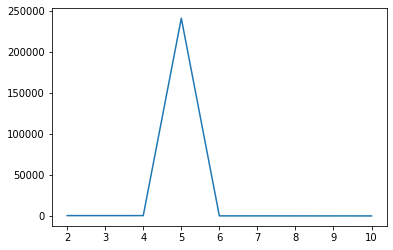

In [7]:
plt.plot(M,solutions)
plt.show()